# 4장 분류

## 01. 지도학습이란?

레이블, 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식을 말한다.  
학습 데이터로 주어진 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것을 말한다.  

분류는 다양한 머신러닝 알고리즘으로 구현할 수 있다.

1. 베이즈 통계와 생성모델에 기반한 나이브 베이즈(Naive Bayes)
2. 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
3. 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
4. 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)
5. 근접 거리를 기준으로 하는 최소 근접 (Nearest Neighbor)
6. 심층 연결 기반의 신경망(Neural Network)
7. 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

### 앙상블이란 ?

일반적으로 배깅(Bagging)과 부스팅(Boosting)으로 나뉜다.  
배깅 방식의 대표적인 알고리즘이 바로 랜덤 포레스트(Random Forest)다.

그러나 근래의 앙상블은 부스팅 방식으로 지속적으로 발전하고 있다.  
부스팅의 효시인 그래디언트 부스팅(Gradient Boosting)의 경우 예측 성능이 뛰어나지만 시간이 매우 오래 걸린다는 단점을 가졌었다.  
하지만 XGBooost와 LightGBM 등 기존의 그래디언트 부스팅을 진화시킨 알고리즘이 계속 등장하고 있다.

앙상블의 개요, 랜덤 포레스트, 그래디언트 부스팅의 전통적인 앙상블 기법뿐만 아니라 최신 기법인 XGBoost, LightGBM 그리고 앙상블의 앙상블이라는 스태킹(Stacking) 기법에 대해 알아보도록 한다.

대부분의 앙상블은 서로 같은 알고리즘을 결합하는 편이며 기본 알고리즘으로 일반적으로 사용하는 기법은 결정 트리다.

### Decision Tree

결정 트리는 매우 쉽고 유연한 알고리즘  
데이터 스케일링과 정규화 등의 사전 가공의 영향이 매우 적다  

하지만 예측 성능 향상을 위해 복잡한 규칙 구조를 가져야하며, 이로 인한 과적합(overfitting) 문제가 발생하여 오히려 성능이 저하될 가능성이 있다.
▶︎ 그러나 앙상블에서는 이러한 단점이 장점으로 작용한다!

그렇다면 결정 트리가 무엇이고, 어떤 특성이 있는지 알아보자

## 02 결정 트리

ML 알고리즘 중 가장 직관적으로 이해하기 쉬운 알고리즘  
데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것  

규칙 노드 : Decision Node, 규칙 조건
리프 노트 : Leaf Node, 결정된 클래스 값  

새로운 규칙 조건마다 서브 트리가 생성된다.

많은 규칙이 있다는 것은 곧 방식이 복잡해진다는 것 = 과적합으로 이어질 가능성이 높아진다.
▶︎ 방식이 복잡해진다는 것은 곧 깊이(Depth)가 깊어진다는 것을 의미한다.

결정 노드를 적게 하기 위해선 (Depth가 깊지 않음) 데이터를 분류할 때 한번에 최대한 많은 데이터 세트가 해당 분류에 속할 수 있어야 한다.  
그러기 위해선 어떻게 트리를 Split해야할 것인지 중요하다.  

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.  
▶︎ 정보 균일도를 측정하는 대표적익 방법으로 엔트로피를 이용한 정보 이득 지수(Information Gain)와 지니 계수가 있다.

정보 이득 : 엔트로피 지수를 개념을 기반으로 한다. 엔트로피는 주어진 데이터의 혼잡도를 의미한다. 불순물이 많이 섞여있으면 엔트로피가 높고, 아니라면 낮다. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값으로 결정 트리는 이 값을 지수로 분할 기준을 정한다.
지니 계수 : 0이 가장 평등하고 1로 갈수록 불평등하다. 즉, 지니 계수가 낮을수록 정보의 균일도가 높다.

결정트리는 sklearn의 DecisionTreeClassifier으로 사용한다.  
정보 균일도는 지니 계수를 활용하여 데이터 세트를 분할한다.

**결정 트리 모델의 특징**
장점 :   

    1. '균일도'라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이다.
    2. '균일도'만 신경 써주면 되기 때문에 **피처 스케일링과 정규화** 같은 전처리 작업이 필요 없다.
    
단점 :  

    1. 과적합으로 인해 정확도가 떨어질 수 있다.
    
▶︎ 과적합은 현실의 데이터에 유연하게 대처하지 못해 정확도가 떨어진다. 따라서 사전에 하이퍼 파라미터 튜닝을 통해 트리의 크기를 사전에 제한하는 것이 좋다.

**결정 트리 파라미터**
사이킷런은 DecisionTreeClassifier / DecisionTreeRegressor 두 가지 클래스를 제공한다.  
사이킷런의 결정 트리 구현은 CART(Classification and Regression Trees) 알고리즘을 기반으로 한다.
두 클래스는 다음과 같은 파라미터를 사용한다.

1. min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수  
                      디폴트 값은 2, **작게 설정할 수록 분할되는 노드가 많아져서 과적합 가능성이 증가한다.**  
                      예를 들어 분할했을 때 특정 분류에 데이터가 2개라면 분할을 진행한다.  
                      
2. min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수
                      min_samples_split과 동일하게 과적합을 제어한다.  
                      그러나 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요하다.  
                     
3. max_features : 최적의 분할을 위해 고려할 최대 피처 개수  
                 디폴트는 None으로 데이터 세트의 모든 피처를 사용하여 분할 수행  
                 int형은 대상 피처의 개수, float형은 전체 피처 중 대상 피처의 퍼센트임  
                 sqrt는 전체 피처 개수의 제곱근값  
                 auto는 sqrt와 동일  
                 log는전체 피처 중 log2(전체피처개수) 선정)  
                 
4. max_depth : 트리의 최대 깊이를 규정
               디폴트는 None으로 완벽하게 클래스 값이 결정될 때까지 깊이를 계속 키우며 분할한다.
               깊이가 깊어질 경우 min_samples_split 설정대로 최대 분할하며 과적합할 수 있으므로 적절한 값으로 제어 필요
               
5.  max_leaf_node : 말단 노드의 최대 개수
                      

**결정 트리의 시각화**

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

print('Training is Done')

Training is Done


Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

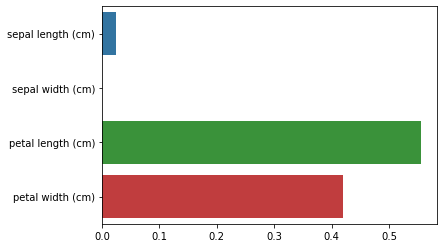

In [26]:
# Feature importances 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# Feature 별 Importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
# Feature importance를 Column 별로 시각화하기
sns.barplot(y=iris_data.feature_names, x=dt_clf.feature_importances_)

## 결정 트리 과적합

결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지와 이로 인한 과적합 문제를 확인한다.  
사이킷런의 make_classification() 함수를 활용하여 2개의 피처가 3가지 유형의 클래스 값을 가지는 세트를 만들고 시각화를 하도록 한다.

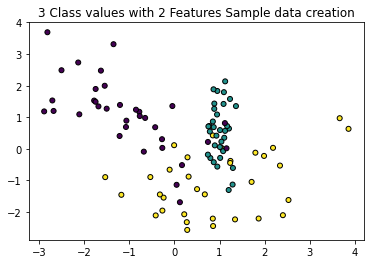

In [30]:
from sklearn.datasets import make_classification

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 혀애로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

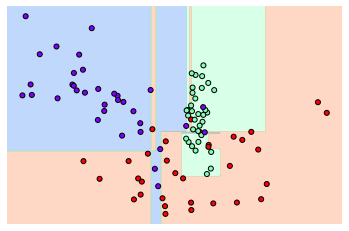

In [37]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    
    
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

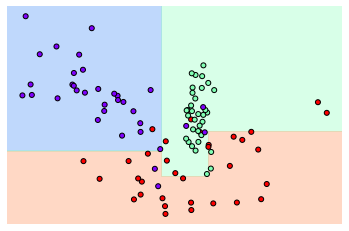

In [39]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

## 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [40]:
import os

In [48]:
# feature.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 데이터프레임으로 로드
feature_name_df = pd.read_csv(str(os.getcwd()) + '/human_activity/features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤, 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [49]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [51]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [54]:
print('## 학습 피처 데이터 셋 info()')
print(X_train.info())

## 학습 피처 데이터 셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [55]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [60]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)

print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DeicisionTreeClassifier 기본 하이퍼 파라미터 추출 :\n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DeicisionTreeClassifier 기본 하이퍼 파라미터 추출 :
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [63]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)



Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.8min finished


GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [66]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [67]:
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.9min finished


GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [69]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
acuuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8548


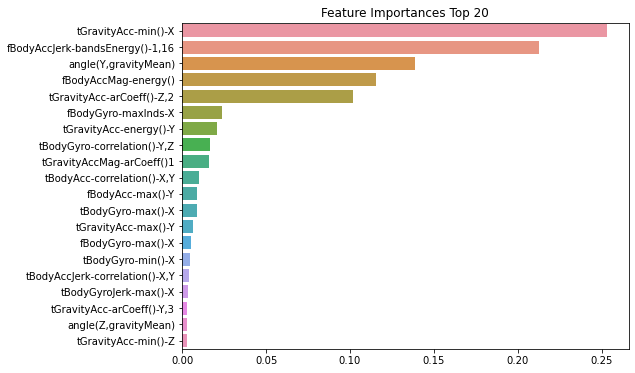

In [71]:
ftr_importances_values = best_df_clf.feature_importances_

ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 03 앙상블 학습

앙상블 학습을 통한 분류는 여러 개의 분류기를 생성하고 그 예측을 결합합으로써 보다 정확한 최종 예측을 도출하는 기법을 말한다.  
이미지, 영상, 음성 등의 비정형 데이터와 달리 정형 데이터 분류는 앙상블이 뛰어난 성능을 나타내고 있다.  

대표적인 앙상블 알고리즘  
**Random Forest** , **GradientBoosting**

최근엔 보팅보다 부스팅 계열의 앙상블 알고리즘의 인기와 강세가 이어져 그래디언트 부스팅을 뛰어넘는 새로운 알고리즘의 개발이 가속화됨  
XGBoost, LightGBM, Stacking을 포함하여 다양한 유형의 앙상블 알고리즘이 머신러닝의 선도 알고리즘으로 인기를 모으고 있다  

*보팅* : 서로 다른 알고리즘을 가진 분류기를 결합  
*배깅* : 각각의 분류기가 모두 같은 유형의 알고리즘이지만 데이터 샘플링을 서로 다르게 가져가며 보팅을 수행함 (대표적 알고리즘 랜덤 포레스트)  

**보팅의 유형**
보팅 방법으로는 소프트 보팅과 하드 보팅이 있다.  
하드 보팅은 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정한다.  
소프트 보팅은 분류기의 레이블 값 결정 확률을 모두 더해 평균하여 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 값으로 선정한다.  
▶︎ 일반적으로 소프트 보팅을 주로 이용한다.  

**보팅 분류기**  
사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공한다.